In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [78]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [79]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [80]:
'''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [81]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнені змінні
    ##################
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    print(X_new)
    return X_new, mean, std

In [82]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [83]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    return X.dot(theta)

In [84]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    J = ((hypothesis(X, theta) - y).T.dot(hypothesis(X, theta) - y)) / (2*m)
    return J

In [85]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    d_theta = (X.T.dot(hypothesis(X,theta) - y)) / m
    return d_theta

In [86]:
'''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    eps = 0.00000000000000001
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        err = np.abs(J-J_history[-1])
        if print_J == True:
            print(J)
        J_history.append(J)
        if (err < eps or num_iters > 100000000):
            break
    return theta, J_history

In [100]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [88]:
# Load the dataset from the CSV file
df = pd.read_csv('burrito.csv')

# Extract features and target
X = df['A'].values  # Feature
y = df['B'].values     # Target

print('Dataset: X={}, y={}'.format(X.shape, y.shape))


Dataset: X=(97,), y=(97,)


In [89]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

Розбиття датасету на частини:

In [90]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

In [91]:
X_train

array([ 5.2524,  5.0365,  5.5649,  7.6366,  6.5159,  7.6031,  5.734 ,
        6.5894,  8.2934,  5.4069, 18.945 ,  5.4369,  8.5781,  7.4239,
        6.1101,  6.3328,  5.7292,  9.2482,  7.0032, 10.136 ,  5.4901,
        5.5277,  8.2111, 14.164 ,  6.3589,  5.3054,  5.5416,  5.3794,
        5.3077,  7.5402,  5.1301,  7.9334, 14.908 ,  5.0594,  6.2742,
        8.0959,  6.8825,  5.8918,  5.4994,  5.6063,  9.4536,  5.0269,
        9.7687,  6.3557,  5.8707,  7.0708, 10.236 , 18.959 ,  5.8014,
       10.274 ,  6.0062, 21.279 ,  7.5386,  5.7077,  5.6407,  5.8598,
       13.394 ,  8.2951, 12.836 ,  6.002 ,  7.4764,  5.5204,  6.3654,
        7.3345,  9.3102,  6.5479,  5.6397,  5.0702,  8.5186, 13.176 ,
        5.1793,  5.7107,  6.4862,  8.3829,  8.8254,  9.1802,  7.0931])

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [92]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

[-0.75818401 -0.82402271 -0.66288715 -0.03112232 -0.37287974 -0.04133814
 -0.61132011 -0.35046592  0.16916881 -0.71106924  3.41737378 -0.70192074
  0.25598806 -0.09598518 -0.49662843 -0.42871608 -0.61278387  0.46033503
 -0.22427762  0.7310696  -0.6856974  -0.67423129  0.14407143  1.95940803
 -0.42075688 -0.74202166 -0.66999248 -0.71945536 -0.74132028 -0.0605195
 -0.79547939  0.05938683  2.1862908  -0.81703935 -0.44658614  0.10894119
 -0.26108508 -0.56319901 -0.68286137 -0.65026222  0.52297175 -0.82695022
  0.61906148 -0.42173272 -0.56963345 -0.20366301  0.7615646   3.42164308
 -0.59076648  0.7731527  -0.52831273  4.12912698 -0.06100742 -0.61934029
 -0.63977194 -0.57295741  1.72459656  0.16968723  1.55443449 -0.52959352
 -0.0799753  -0.67645742 -0.41877471 -0.1232477   0.47924193 -0.36312134
 -0.64007689 -0.81374589  0.23784354  1.65811747 -0.78047585 -0.61842544
 -0.38193675  0.19646183  0.33140219  0.43959843 -0.19686262]


Для спрощення записів аліас для вектора передбачуваних значень

In [93]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [94]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
#theta = np.array([0, 0])
#X = prepare_X(X)
#print(cost_function(X, y, theta)) #32.072 - ok

X: (77, 2)
y: (77,)


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [95]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [96]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1])) #Theta 0: 5.84; Theta 1: 4.59

Theta 0: 5.365361984576228; Theta 1: 3.816966330652754


Відображення штрафної функції як функції від thetha0, thetha1.

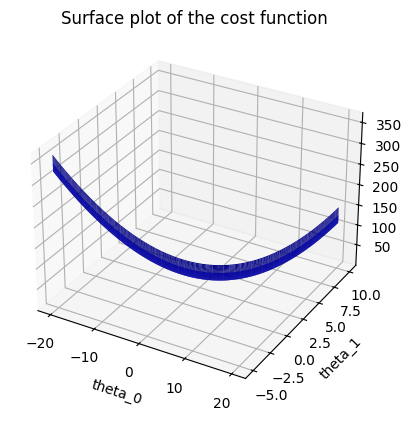

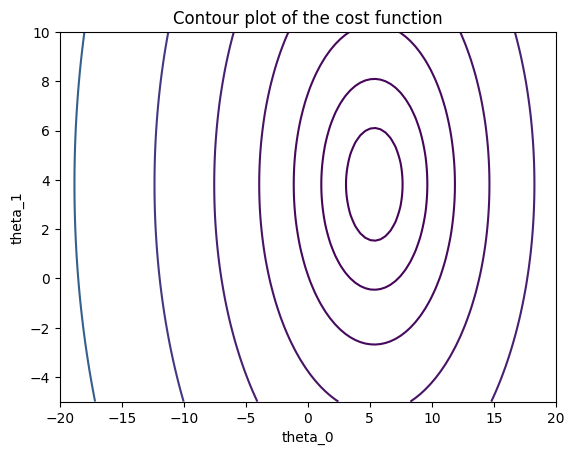

In [101]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

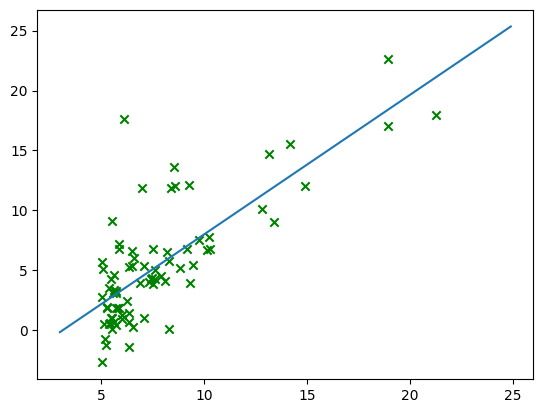

In [102]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [103]:
####################
X_test_proc = (X_test-mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test.squeeze(), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print("cost_function: ",cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
0   20.3410  20.99200  20.034284     4.562291
1   22.2030  24.14700  22.201622     8.056398
2    6.3261   5.18750   3.721168    28.266632
3   10.9570   7.04670   9.111461    29.301101
4   11.7000   8.00430   9.976301    24.636765
5    7.2259   3.34110   4.768521    42.723086
6    6.4296   3.65180   3.841641     5.198554
7    5.0546   3.81660   2.241163    41.278542
8   11.7080   5.38540   9.985612    85.420070
9    5.1884   0.20421   2.396904  1073.744767
10   6.3534   5.49740   3.752945    31.732360
11   5.7737   2.44060   3.078184    26.124062
12  12.8280  13.50100  11.289274    16.381940
13   6.1891   3.13860   3.561703    13.480619
14   5.1077   2.05760   2.302971    11.925093
15  20.2700  21.76700  19.951641     8.339959
16   7.8247   6.73180   5.465514    18.810504
17   8.4084   7.22580   6.144932    14.958458
18   7.2182   4.88520   4.759558     2.571884
19   8.5172   4.24150   6.271573    47.862152
cost_function:  1.6078539457386385

In [106]:
X = np.concatenate((X_train, X_test), axis=None)
X = (X-mean)/std
X = prepare_X(X)

y = np.concatenate((y_train, y_test), axis=None)

y_pred = hypothesis(X,new_theta)
print("R\u00b2 = ", r2_score(y,y_pred))

R² =  0.701606332625286
